Dataset Overview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79

<ipython-input-1-ad8e30c48f4e>:23: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'])


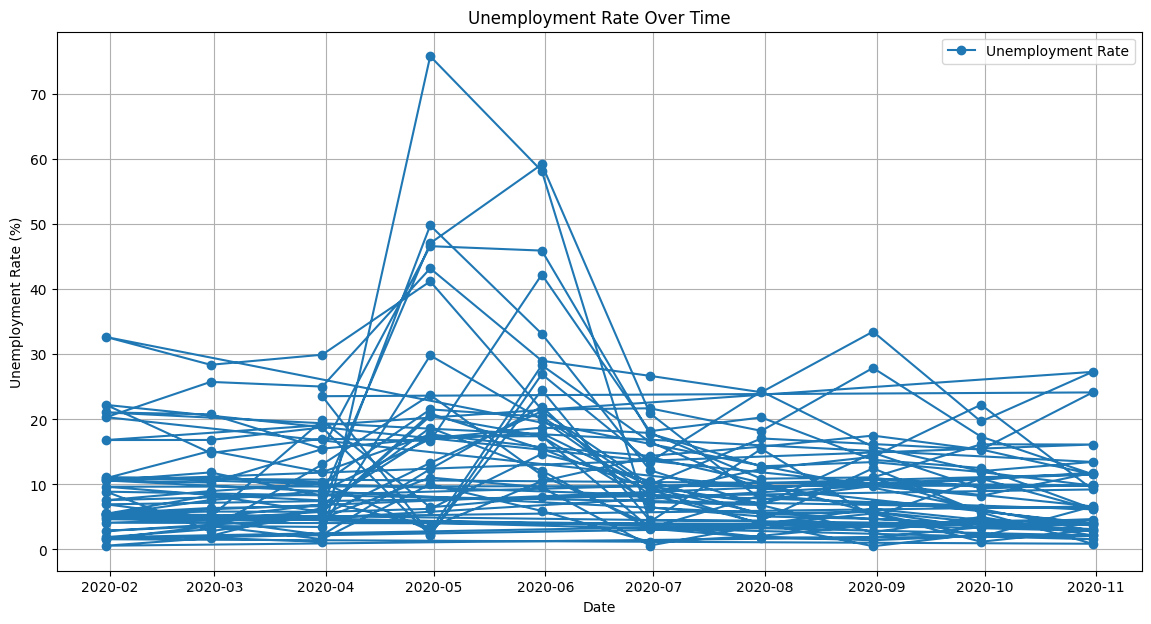

<ipython-input-1-ad8e30c48f4e>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)', ci=None, palette="viridis")
<ipython-input-1-ad8e30c48f4e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)', ci=None, palette="viridis")


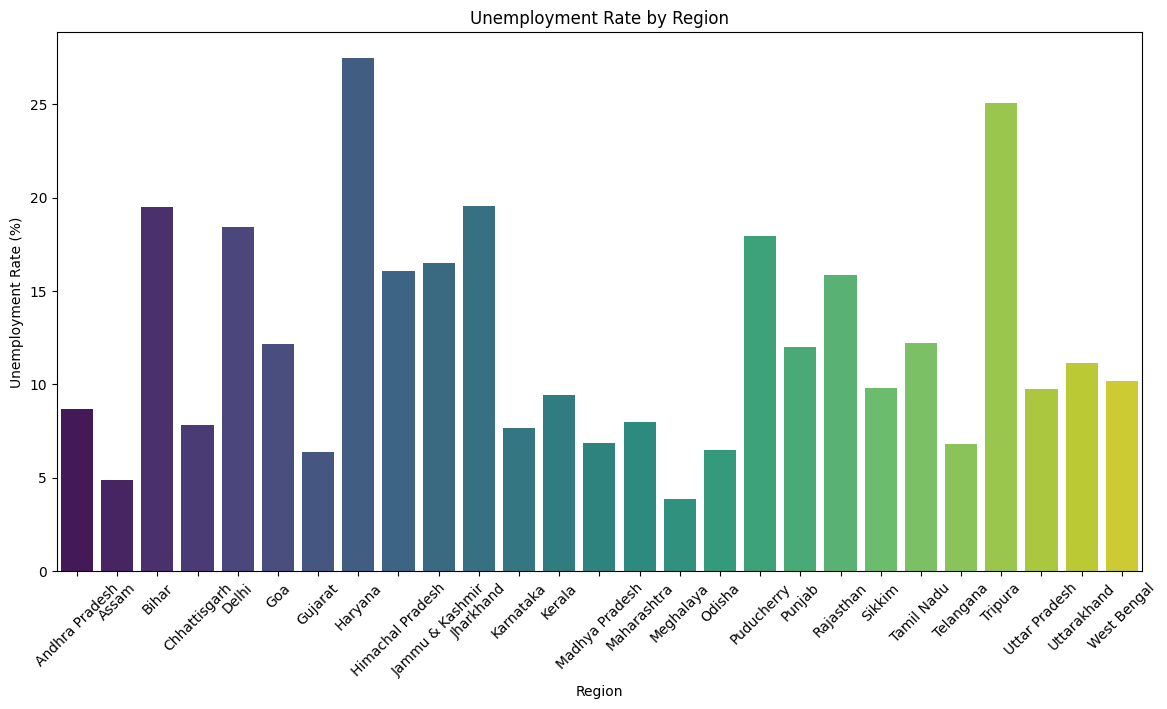

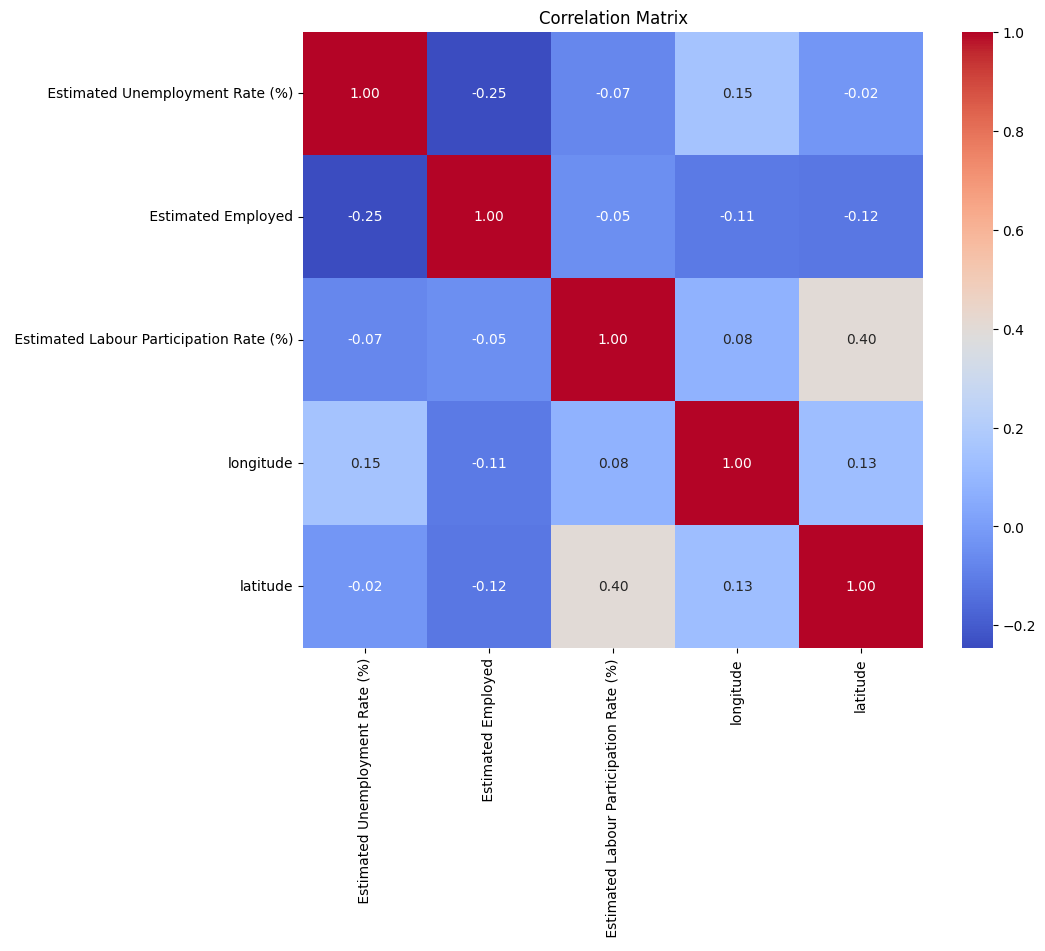


Processed data saved to '/content/drive/MyDrive/UnemploymentAnalysis/outputs/processed_unemployment_data.csv'.


In [1]:
# unemployment_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
data_path = '/content/drive/MyDrive/UnemploymentAnalysis/datasets/Unemployment_Rate_upto_11_2020.csv'
output_path = '/content/drive/MyDrive/UnemploymentAnalysis/outputs'

# Load the dataset
df = pd.read_csv(data_path)

# Data Overview
print("Dataset Overview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

# Convert 'Date' column to datetime format for time series analysis
df['Date'] = pd.to_datetime(df[' Date'])

# Handle missing or duplicate values
print("\nMissing Values:")
print(df.isnull().sum())

df = df.drop_duplicates()

# Line Chart: Unemployment Rate Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df[' Estimated Unemployment Rate (%)'], marker='o', label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_path, 'unemployment_trend.png'))
plt.show()

# Bar Chart: Unemployment Rate by Region
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)', ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title('Unemployment Rate by Region')
plt.ylabel('Unemployment Rate (%)')
plt.savefig(os.path.join(output_path, 'unemployment_by_region.png'))
plt.show()

# Heatmap: Correlation Analysis
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig(os.path.join(output_path, 'correlation_matrix.png'))
plt.show()
# Save the processed dataset
processed_file_path = os.path.join(output_path, 'processed_unemployment_data.csv')
df.to_csv(processed_file_path, index=False)
print(f"\nProcessed data saved to '{processed_file_path}'.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')